# Generating Results for Sensitivity Analyses

### Berk Onat, Christoph Ortner, James R. Kermode

This document generates the results of following publication:

> **Berk Onat, Christoph Ortner, James R. Kermode** , *"Sensitivity and Dimensionality of Atomic Environment Representations used for Machine Learning Interatomic Potentials"*, [J. Chem. Phys. 153 (2020)](https://doi.org/10.1063/5.0016005)

#### Please check DescriptorZoo.jl installation before starting

[Installation document for DescriptorZoo.jl](https://github.com/DescriptorZoo/DescriptorZoo.jl)

In [1]:
using ASE
using JuLIP
using DescriptorZoo
using DescriptorZoo.SHIPs.Descriptors: SHIPDescriptor
using QUIP

using Plots
using LaTeXStrings
using Plots.PlotMeasures
using LinearAlgebra
import JSON
import JuLIP: evaluate
using Random

┌ Info: Precompiling ASE [51974c44-a7ed-5088-b8be-3e78c8ba416c]
└ @ Base loading.jl:1273
┌ Info: Skipping precompilation since __precompile__(false). Importing ASE [51974c44-a7ed-5088-b8be-3e78c8ba416c].
└ @ Base loading.jl:1028
┌ Warning: Package ASE does not have Requires in its dependencies:
│ - If you have ASE checked out for development and have
│   added Requires as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with ASE
│ Loading Requires into ASE from project dependency, future warnings for ASE are suppressed.
└ @ nothing nothing:904
┌ Info: Precompiling DescriptorZoo [c2b516e9-892e-46cd-9b98-1bc27c4badb2]
└ @ Base loading.jl:1273
┌ Warning: Module ASE with build ID 534992936959873 is missing from the cache.
│ This may mean ASE [51974c44-a7ed-5088-b8be-3e78c8ba416c] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1011
┌ Info: Skipping pre

### Setting parameters for analyses
For more details please check the reference paper.

In [2]:
# Global parameters
center_atom = 337
pert_atom = 337
rcut = 6.5
pert = 0.02

# Change parameters here SHIPs
n_max = 6
l_max = 6

# Change parameters here SHIPs
degree = 18
bond_ord = 5
species = :Si
wL = 1.5     # how to weight the angular component

1.5

### Initialization of support functions to calculate environment of selected atoms

In [214]:
evaluate(b::SHIPBasis, Rs::AbstractVector{JVecF}) =
   evaluate(b, Rs, zeros(Int, length(Rs)), 0)

function get_si_env(rcut, center_atom)
   at = bulk(:Si, cubic=true) * (4,4,4)
   display(size(at.X))
   Rs = JVecF[]
   for (i, j, R) in pairs(neighbourlist(at, rcut))
      if (i == center_atom) && (j != center_atom)
         push!(Rs, R)
      end
   end
   return Rs
end

function get_si_env_co(rcut, center_atom)
   at = bulk(:Si, cubic=true) * (4,4,4)
   nlist = neighbourlist(at, rcut)
   return neigs(nlist, center_atom)[2]
end

get_si_env_co (generic function with 1 method)

### Setting support functions for Descriptors and Representations of DescriptorZoo.jl

In [215]:
# define CHSF descriptor
get_chsf(Rs) = chsf_desc(Rs, rcut, n=n_max, l=l_max)

# define CHSF-mix descriptor
get_chsf2(Rs) = chsf_desc_RADF(Rs, rcut, n=n_max, l=l_max, np=true)

# define ACSF (ACSF.jl) descriptor
get_acsf(Rs) = acsf_desc(Rs)

# define SOAP descriptor
get_soap(at) = soap(at, rcut, n_max=n_max, l_max=l_max)

# define SOAPlite descriptor
get_soaplite(at) = soaplite(at, rcut, n_max=n_max, l_max=l_max)

# define MBTR representation
get_mbtr(at) = mbtr(at)


get_mbtr (generic function with 1 method)

In [216]:
# define the ACE descriptor
trans = PolyTransform(2, 1.0)
cutf = PolyCutoff1s(2, 0.66 * rnn(species), rcut)
shipB = SHIPBasis(SparseSHIP(bond_ord-1, degree; wL = wL), trans, cutf)
get_ship(Rs) = evaluate(shipB, Rs)

get_ship (generic function with 1 method)

In [217]:
# define AMP ACSF descriptors
get_acsfx(at) = amp_acsf(at, Behler2011=false, cuttype="Tanhyper3")
get_amp_acsf(at) = amp_acsf(at)

get_amp_acsf (generic function with 1 method)

### Calculation of reference atomic configuration and neighbouring atom vectors

In [263]:
Rref = get_si_env_co(rcut, center_atom)
i1 = 6 # [1.3575, -1.3575, -1.3575]
i2 = 5 
i3 = 1 
i4 = length(Rref)
i5 = 4
[ sort(unique(round.(norm.(Rref), digits=10))) norm.(Rref[[i1,i2,i3,i4,i5]]) ]

5×2 Array{Float64,2}:
 2.35126  2.35126
 3.83959  3.83959
 4.50232  4.50232
 5.43     5.43   
 5.91721  5.91721

### Setting the perturbations for selected neighbouring atoms at different shells

In [264]:
#1st Shell urand
i0 = i1  # choose which shell to perturb 
r̂ = Rref[i0] / norm(Rref[i0])
u = [0.079, 1.396, 0.1999]
pert_amount = [0.909111398515756, 0.22055078463085032, 0.9030566723078015, 0.19997820793003318, 0.4318919923406719, 0.5804910484270516, 0.7386878026385, 0.8909989525778934, 0.5951124197620845, 0.046226128298140656, 0.4109324143615549, 0.01077372886792971, 0.870331338116608, 0.2669859665225107, 0.3381735930662244, 0.8656325921507673, 0.6309143351381656, 0.6349194478133553, 0.25578852611650205, 0.6292588224461342, 0.12328177708947807, 0.2721578032170524, 0.18208883672012544, 0.39252713653370197, 0.39183807296566053, 0.5846870415343834, 0.15194468225200497, 0.026402493734938748, 0.14092039636072062, 0.3500975799452324, 0.7984205744391748, 0.32685962249918266, 0.6023460420608775, 0.24266638752680714, 0.494755819010658, 0.04877875300422674, 0.5461407128136735, 0.020041282895423507, 0.3744889986806592, 0.7859654996352834, 0.5114043663013057, 0.7134633912663839, 0.7498025785571449, 0.9598154225292044, 0.7298880410131985, 0.45918297182071366]
Rpert1 = Rref .* (1 .+ 2*pert*(pert_amount .- 0.5))
u -= r̂ * dot(r̂, u)
u /= norm(u)
U1 = zeros(JVecF, length(Rref))
U1[i0] = u

#1st Shell high symmetry
i0 = i1  # choose which shell to perturb 
r̂ = Rref[i0] / norm(Rref[i0])
u = [0,1,-1]
pert_amount = [0.909111398515756, 0.22055078463085032, 0.9030566723078015, 0.19997820793003318, 0.4318919923406719, 0.5804910484270516, 0.7386878026385, 0.8909989525778934, 0.5951124197620845, 0.046226128298140656, 0.4109324143615549, 0.01077372886792971, 0.870331338116608, 0.2669859665225107, 0.3381735930662244, 0.8656325921507673, 0.6309143351381656, 0.6349194478133553, 0.25578852611650205, 0.6292588224461342, 0.12328177708947807, 0.2721578032170524, 0.18208883672012544, 0.39252713653370197, 0.39183807296566053, 0.5846870415343834, 0.15194468225200497, 0.026402493734938748, 0.14092039636072062, 0.3500975799452324, 0.7984205744391748, 0.32685962249918266, 0.6023460420608775, 0.24266638752680714, 0.494755819010658, 0.04877875300422674, 0.5461407128136735, 0.020041282895423507, 0.3744889986806592, 0.7859654996352834, 0.5114043663013057, 0.7134633912663839, 0.7498025785571449, 0.9598154225292044, 0.7298880410131985, 0.45918297182071366]
Rpert11 = Rref .* (1 .+ 2*pert*(pert_amount .- 0.5))
u -= r̂ * dot(r̂, u)
u /= norm(u)
U11 = zeros(JVecF, length(Rref))
U11[i0] = u

#2nd Shell
i0 = i2  # choose which shell to perturb 
r̂ = Rref[i0] / norm(Rref[i0])
u=[0.02130284326874177, 0.17090978941923035, 0.9692626451063107]
pert_amount=[0.6189181448683523, 0.5746807319159866, 0.04670463988660489, 0.8579617666339756, 0.41998117578309047, 0.2692236568948734, 0.01197427552598751, 0.28852744990907264, 0.2808818743902799, 0.49487851259308924, 0.45870070804388896, 0.0738672080910252, 0.27056671757412487, 0.8392684804249715, 0.17494166749543028, 0.7972288054470464, 0.19890152763769708, 0.6649549892305402, 0.6547265656161148, 0.2503171113810394, 0.489241636352878, 0.02212820302777252, 0.7515254404184539, 0.22757380367387192, 0.9430268514193201, 0.4433727623999384, 0.4162429254852451, 0.5587471609383479, 0.31138618448451316, 0.7234358211764962, 0.1425902915444084, 0.376854633896198, 0.48410094101425094, 0.09758295450371612, 0.009951209798222171, 0.6046327512226739, 0.6473020405478174, 0.4419674801381692, 0.6203009995061912, 0.6651336284372436, 0.10045367367599245, 0.4999473887020156, 0.21324918220946731, 0.042956085343082595, 0.07011185155470634, 0.2956516113740242]
Rpert2 = Rref .* (1 .+ 2*pert*(pert_amount .- 0.5))
u -= r̂ * dot(r̂, u)
u /= norm(u)
U2 = zeros(JVecF, length(Rref))
U2[i0] = u

#3rd Shell
i0 = i3  # choose which shell to perturb 
r̂ = Rref[i0] / norm(Rref[i0])
u = [-0.3966, -1.3654, 0.9014]
pert_amount = [0.06361764696284755, 0.13542661820979385, 0.6446103657570312, 0.847227607412558, 0.3803222273791358, 0.8233357947702824, 0.6715819925052979, 0.5499712458002175, 0.35567200900683993, 0.5756293472917193, 0.24203461720622665, 0.28527958330010206, 0.953266805430288, 0.5026142206973354, 0.3087529980960253, 0.8786864727087742, 0.28050668501274867, 0.6048116623276925, 0.03336961832079721, 0.6444757254763991, 0.9404355388608936, 0.2074084800121705, 0.6024395067398489, 0.06807884912917306, 0.7550116615184124, 0.9812499116007125, 0.7248013999564731, 0.34524920188264363, 0.30358982594492434, 0.636740486542976, 0.42238911332648654, 0.6055231993181613, 0.27231950125325777, 0.5665141297213587, 0.7800762985835636, 0.14462471461618498, 0.24473165597238533, 0.9180388244203912, 0.8614784340173638, 0.4237945445804647, 0.26627481353063454, 0.39951218427683455, 0.1558112288258462, 0.6988593065081341, 0.7821726683536556, 0.5508492490920842]
Rpert3 = Rref .* (1 .+ 2*pert*(pert_amount .- 0.5))
u -= r̂ * dot(r̂, u)
u /= norm(u)
U3 = zeros(JVecF, length(Rref))
U3[i0] = u

#4th Shell
i0 = i4  # choose which shell to perturb 
r̂ = Rref[i0] / norm(Rref[i0])
u = [-0.41580315230904646, -0.7294570365559557, -0.5224058059067016]
pert_amount = [0.4611042581205089, 0.1486808042234491, 0.957695811577921, 0.20412880505622688, 0.13396836716256222, 0.6560458362051569, 0.8577063711050648, 0.5255077478264181, 0.8354772799635151, 0.5207011376532729, 0.10650563287967518, 0.8887006138120681, 0.3379428874534305, 0.20432561762596357, 0.43060137188890857, 0.5317825450729265, 0.04566459477759177, 0.6194218514197425, 0.5788495074053503, 0.8160260597109541, 0.14679364383307036, 0.36083021212253197, 0.023282839906338726, 0.28677943562473796, 0.06619491407269296, 0.03863265481136957, 0.317453008589742, 0.0752662918966549, 0.9406070869276457, 0.6789232109569854, 0.3393714862042021, 0.7832418785232205, 0.12548153374710425, 0.32670732817877335, 0.46938400492569143, 0.1966588081457683, 0.040440523144363416, 0.03651515326745791, 0.44714518129297853, 0.780842063195281, 0.0625438764091999, 0.488405395515481, 0.5106677752967235, 0.4994793216556943, 0.04208015740917426, 0.8426723914312568]
Rpert4 = Rref .* (1 .+ 2*pert*(pert_amount .- 0.5))
u -= r̂ * dot(r̂, u)
u /= norm(u)
U4 = zeros(JVecF, length(Rref))
U4[i0] = u

3-element StaticArrays.SArray{Tuple{3},Float64,1,3} with indices SOneTo(3):
 -0.49521440767494507
 -0.868770792805072  
  0.0                

### Setting calculation grid for perturbations

In [278]:
# specify the calculation grid for tangential perturbations
tt = exp10.(-7:0.01:1)
tt2 = exp10.(-7:0.1:1) # decreasing density here since some codes work slower
tt3 = exp10.(-12:0.2:-1) # decreasing density here since some codes work slower
tt4 = exp10.(-8:0.01:-1)
tt5 = exp10.(-8:0.1:-1) # decreasing density here since some codes work slower
tt6 = exp10.(-8:0.01:1)
tt7 = exp10.(-5:0.01:0)
tt8 = exp10.(-5:0.1:0) # decreasing density here since some codes work slower
# tt3 = exp10.(-7:0.01:1)
# tt2 = exp10.(-5:0.1:0) # decreasing density here since some codes work slower

# specify the calculation grid for radial and mixed perturbations
rr = exp10.(-8:0.01:-1)
rr2 = exp10.(-8:0.1:-1) # decreasing density here since some codes work slower
rr3 = exp10.(-8:0.2:-1) # decreasing density here since some codes work slower



36-element Array{Float64,1}:
 1.0e-8               
 1.5848931924611143e-8
 2.511886431509582e-8 
 3.981071705534969e-8 
 6.30957344480193e-8  
 1.0e-7               
 1.584893192461114e-7 
 2.5118864315095823e-7
 3.981071705534969e-7 
 6.30957344480193e-7  
 1.0e-6               
 1.584893192461114e-6 
 2.5118864315095823e-6
 ⋮                    
 0.000630957344480193 
 0.001                
 0.001584893192461114 
 0.0025118864315095794
 0.003981071705534973 
 0.00630957344480193  
 0.01                 
 0.015848931924611134 
 0.025118864315095794 
 0.039810717055349734 
 0.06309573444801933  
 0.1                  

### Defining support functions for recording perturbation along a selected path

In [390]:
tt = exp10.(-7:0.01:1)

function path(R0, U, t; onsphere=true)
    Rt = R0 + t * U
    # this normalisation ensures that the perturbation 
    # stays on the original sphere!
    if onsphere
        Rt = Rt .*  (norm.(R0) ./ norm.(Rt))
    end
    return Rt
end

function get_si_env_pert_path(t, center_atom, rcut, U; Rpert=nothing, onsphere=true, verbose=false)
    at = bulk(:Si, cubic=true) * (4,4,4)
    nlist = neighbourlist(at, rcut)
    js = neigs(nlist, center_atom)[1]
    R0 = neigs(nlist, center_atom)[2]
    if Rpert != nothing
        for (jj, j) in enumerate(js)
            at.X[j,:] .-= Rpert[jj,:] - R0[jj,:]
        end
    end
    Rt = R0 + t * U
    if onsphere
        Rt = Rt .*  (norm.(R0) ./ norm.(Rt))
    end
    for (jj, j) in enumerate(js)
        at.X[j,:] .-= Rt[jj,:] - R0[jj,:]
    end
    if verbose
        println("t:",t)
    end
    return at
end

function allatompath(desc, center_atom, rcut, U, tt; Rpert=nothing, getdataset=false, verbose=false, onsphere=true)
    if getdataset
        dataset= []
    end
    at = bulk(:Si, cubic=true) * (4,4,4)
    if Rpert != nothing
        nlist = neighbourlist(at, rcut)
        js = neigs(nlist, center_atom)[1]
        R0 = neigs(nlist, center_atom)[2]
        for (jj, j) in enumerate(js)
            at.X[j,:] .-= Rpert[jj,:] - R0[jj,:]
        end
    end
    if getdataset
        push!(dataset,at)
    end
    BBref = desc(at)[center_atom,:]
    println(length(BBref))
    [ norm(desc(get_si_env_pert_path(
                    t, center_atom, rcut, U, Rpert=Rpert, verbose=verbose, onsphere=onsphere
                    ))[center_atom,:] - BBref) / norm(BBref)
           for t in tt ]
end


# aux function to get the perturbations of the descriptors
chsfpath(U, R0, tt; onsphere=true, BBref = get_chsf(R0)) = 
        [ norm(get_chsf(path(R0, U, t, onsphere=onsphere)) - BBref) / norm(BBref)
          for t in tt ]

#aux function to get the perturbations of the descriptors
chsfpath2(U, R0, tt; onsphere=true, BBref = get_chsf2(R0)) = 
        [ norm(get_chsf2(path(R0, U, t, onsphere=onsphere)) - BBref) / norm(BBref)
          for t in tt ]

acsfpath(U, R0, tt; onsphere=true, BBref = get_acsf(R0)) = 
        [ norm(get_acsf(path(R0, U, t, onsphere=onsphere)) - BBref) / norm(BBref)
          for t in tt ]

shipspath(U, R0, tt; onsphere=true, BBref = get_ship(R0)) =  
        [ norm(get_ship(path(R0, U, t, onsphere=onsphere)) - BBref) / norm(BBref)
          for t in tt ]


shipspath (generic function with 3 methods)

## Generation of results for figure 5 (b), (c) and (d)

### Calculations of Tangential Perturbations for all descriptors

In [265]:
# ACSF.jl
btan_a11 = acsfpath(U11, Rref, tt)
btanp_a11 = acsfpath(U11, Rpert11, tt)
btanp_a1 = acsfpath(U11, Rpert1, tt)
btan_a2 = acsfpath(U2, Rref, tt)

# CHSF-mix (CHSF.jl)
btan_c2c11 = chsfpath2(U11, Rref, tt)
btanp_c2c11 = chsfpath2(U11, Rpert11, tt)
btanp_c2c1 = chsfpath2(U11, Rpert1, tt)
btan_c2c2 = chsfpath2(U2, Rref, tt)

# ACE (ACE.jl)
btan_s11 = shipspath(U11, Rref, tt)
btanp_s11 = shipspath(U11, Rpert11, tt)
btanp_s1 = shipspath(U11, Rpert1, tt)
btan_s2 = shipspath(U2, Rref, tt)

# CHSF (CHSF.jl)
btan_c11 = chsfpath(U11, Rref, tt)
btanp_c11 = chsfpath(U11, Rpert11, tt)
btanp_c1 = chsfpath(U1, Rpert1, tt)
btan_c2 = chsfpath(U2, Rref, tt)


801-element Array{Float64,1}:
 2.1601844637076565e-11
 2.2105127682189803e-11
 2.26200065959449e-11  
 2.3147036518760405e-11
 2.3686208040099548e-11
 2.4237904632233604e-11
 2.4802493716412003e-11
 2.5380176147502493e-11
 2.5971324691608147e-11
 2.657644421388624e-11 
 2.719542370368964e-11 
 2.7828797212921934e-11
 2.8477119801123162e-11
 ⋮                     
 0.0018728568615674144 
 0.0017918952468141346 
 0.0017116595471564741 
 0.0016322776614609198 
 0.0015538687425401048 
 0.001476543328136365  
 0.0014004035562743833 
 0.0013255434657152235 
 0.0012520493845063197 
 0.001180000412874316  
 0.0011094690112841861 
 0.001040521711033146  

In [12]:
# SOAP (QUIP.jl)
btan_o11 = allatompath(get_soap, center_atom, rcut, U11, tt)
btanp_o11 = allatompath(get_soap, center_atom, rcut, U11, tt, Rpert=Rpert11)
btan_o2 = allatompath(get_soap, center_atom, rcut, U2, tt)

# SOAPlite (SOAPlite.jl)
btan_l11 = allatompath(get_soaplite, center_atom, rcut, U11, tt)
btanp_l11 = allatompath(get_soaplite, center_atom, rcut, U11, tt, Rpert=Rpert11)
btan_l2 = allatompath(get_soaplite, center_atom, rcut, U2, tt)

147
147
147
147
147
147


501-element Array{Float64,1}:
 1.9070558253256037e-9
 1.9514772242975867e-9
 1.9969332426322207e-9
 2.04344818147444e-9  
 2.091046683940788e-9 
 2.1397538508866687e-9
 2.189595587662028e-9 
 2.2405982425486373e-9
 2.2927889613319608e-9
 2.3461954031293477e-9
 2.4008458077303423e-9
 2.456769242029033e-9 
 2.5139954085473243e-9
 ⋮                    
 0.005931119257400506 
 0.006183244980990639 
 0.006444837790322907 
 0.006716142084145873 
 0.006997398689894798 
 0.007288843830974493 
 0.007590708036586345 
 0.007903214998647214 
 0.008226580381909657 
 0.008561010595094379 
 0.008906701532685983 
 0.009263837298983025 

In [276]:
btanp_o1 = allatompath(get_soap, center_atom, rcut, U1, tt, Rpert=Rpert1)
btanp_l1 = allatompath(get_soaplite, center_atom, rcut, U1, tt, Rpert=Rpert1)

147
147


801-element Array{Float64,1}:
 5.84100200452436e-11 
 5.977059006452496e-11
 6.116282770666378e-11
 6.258747411400374e-11
 6.404534536698461e-11
 6.55371563069053e-11 
 6.706368454091875e-11
 6.862579988292474e-11
 7.022428421666387e-11
 7.18600376020428e-11 
 7.35338793677867e-11 
 7.524667630558565e-11
 7.699939438685471e-11
 ⋮                    
 0.08203099700499272  
 0.08209329989423213  
 0.08215139397891644  
 0.08220557962151215  
 0.08225613738551862  
 0.08230332902998452  
 0.08234739849976996  
 0.08238857290354862  
 0.08242706347299829  
 0.08246306649776301  
 0.08249676423181038  
 0.08252832576789494  

In [13]:
# ACSF (AMP)
btan_ap11 = allatompath(get_amp_acsf, center_atom, rcut, U11, tt2, verbose=true)
btanp_ap11 = allatompath(get_amp_acsf, center_atom, rcut, U11, tt2, Rpert=Rpert11, verbose=true)
btan_ap2 = allatompath(get_amp_acsf, center_atom, rcut, U2, tt2, verbose=true)

# ACSF-X (AMP)
btan_x11 = allatompath(get_acsfx, center_atom, rcut, U11, tt2, verbose=true)
btanp_x11 = allatompath(get_acsfx, center_atom, rcut, U11, tt2, Rpert=Rpert11, verbose=true)
btan_x2 = allatompath(get_acsfx, center_atom, rcut, U2, tt2, verbose=true)


51
t:1.0e-5
t:1.2589254117941663e-5
t:1.584893192461114e-5
t:1.995262314968879e-5
t:2.5118864315095822e-5
t:3.1622776601683795e-5
t:3.9810717055349695e-5
t:5.011872336272725e-5
t:6.309573444801929e-5
t:7.943282347242822e-5
t:0.0001
t:0.00012589254117941674
t:0.00015848931924611142
t:0.00019952623149688788
t:0.00025118864315095795
t:0.00031622776601683794
t:0.00039810717055349735
t:0.0005011872336272725
t:0.000630957344480193
t:0.0007943282347242813
t:0.001
t:0.0012589254117941675
t:0.001584893192461114
t:0.001995262314968879
t:0.0025118864315095794
t:0.0031622776601683794
t:0.003981071705534973
t:0.005011872336272725
t:0.00630957344480193
t:0.007943282347242814
t:0.01
t:0.012589254117941675
t:0.015848931924611134
t:0.0199526231496888
t:0.025118864315095794
t:0.03162277660168379
t:0.039810717055349734
t:0.05011872336272723
t:0.06309573444801933
t:0.07943282347242814
t:0.1
t:0.12589254117941673
t:0.15848931924611134
t:0.19952623149688797
t:0.251188643150958
t:0.31622776601683794
t:0.3981

51-element Array{Float64,1}:
 1.663027966813244e-9  
 2.0938496921603545e-9 
 2.6363518423948296e-9 
 3.319527359583651e-9  
 4.17992065732172e-9   
 5.263609305089877e-9  
 6.628714011857112e-9  
 8.348583173988983e-9  
 1.051584100875108e-8  
 1.3247547517688207e-8 
 1.669179366729824e-8  
 2.1036166462708838e-8 
 2.6518664864081368e-8 
 ⋮                     
 9.439019187857757e-5  
 0.00014700023477819414
 0.00022970005492134205
 0.00035976384855469   
 0.0005642593817143559 
 0.0008853651441151928 
 0.0013882110466779671 
 0.0021718923114646313 
 0.0033835886349189003 
 0.005233321778231882  
 0.008000981097979792  
 0.012015366561894085  

In [277]:
btanp_ap1 = allatompath(get_amp_acsf, center_atom, rcut, U1, tt2, Rpert=Rpert1, verbose=true)
btanp_x1 = allatompath(get_acsfx, center_atom, rcut, U1, tt2, Rpert=Rpert1, verbose=true)

51
t:1.0e-7
t:1.2589254117941662e-7
t:1.584893192461114e-7
t:1.9952623149688787e-7
t:2.5118864315095823e-7
t:3.162277660168379e-7
t:3.981071705534969e-7
t:5.011872336272725e-7
t:6.30957344480193e-7
t:7.943282347242822e-7
t:1.0e-6
t:1.2589254117941661e-6
t:1.584893192461114e-6
t:1.9952623149688787e-6
t:2.5118864315095823e-6
t:3.162277660168379e-6
t:3.981071705534969e-6
t:5.011872336272725e-6
t:6.30957344480193e-6
t:7.943282347242822e-6
t:1.0e-5
t:1.2589254117941663e-5
t:1.584893192461114e-5
t:1.995262314968879e-5
t:2.5118864315095822e-5
t:3.1622776601683795e-5
t:3.9810717055349695e-5
t:5.011872336272725e-5
t:6.309573444801929e-5
t:7.943282347242822e-5
t:0.0001
t:0.00012589254117941674
t:0.00015848931924611142
t:0.00019952623149688788
t:0.00025118864315095795
t:0.00031622776601683794
t:0.00039810717055349735
t:0.0005011872336272725
t:0.000630957344480193
t:0.0007943282347242813
t:0.001
t:0.0012589254117941675
t:0.001584893192461114
t:0.001995262314968879
t:0.0025118864315095794
t:0.00316

81-element Array{Float64,1}:
 1.1369660271871241e-10
 1.431355418557717e-10 
 1.8019700682102432e-10
 2.2685470451665184e-10
 2.855932100028467e-10 
 3.595407063578529e-10 
 4.5263520455137905e-10
 5.698342949780428e-10 
 7.17379489648701e-10  
 9.031282882982134e-10 
 1.1369727181107157e-9 
 1.4313664244812172e-9 
 1.8019875282592396e-9 
 ⋮                     
 0.016417142312711797  
 0.02391636970538634   
 0.0337523184202283    
 0.04579781115461068   
 0.05930361299907538   
 0.07300478713584445   
 0.08557117662134367   
 0.09612569133921549   
 0.10437973891211572   
 0.11052507282477148   
 0.11498178669825539   
 0.11818503542190041   

## Generation of results for Figure 5 (a)

### Setting Radial Perturbation

In [387]:
i0 = i1  # choose which shell to perturb 
r̂ = Rref[i0] / norm(Rref[i0])
u = [1,-1,-1]
#u -= r̂ * dot(r̂, u)
u /= norm(u)
U0 = zeros(JVecF, length(Rref))
U0[i0] = u

3-element Array{Float64,1}:
  0.5773502691896258
 -0.5773502691896258
 -0.5773502691896258

In [388]:
Rref[i1]

3-element StaticArrays.SArray{Tuple{3},Float64,1,3} with indices SOneTo(3):
  1.3575
 -1.3575
 -1.3575

### Calculation of radial perturbation for all descriptors

In [391]:
brad_c1 = chsfpath(U0, Rref, rr3, onsphere=false)
brad_c2 = chsfpath2(U0, Rref, rr3, onsphere=false)
brad_s1 = shipspath(U0, Rref, rr3, onsphere=false)

36-element Array{Float64,1}:
 3.761064562760672e-9  
 5.960885195361135e-9  
 9.447366216914822e-9  
 1.4973066303389135e-8 
 2.3730709819662754e-8 
 3.761063845134234e-8  
 5.960884048029716e-8  
 9.447363426841415e-8  
 1.497305920949672e-7  
 2.3730692670347247e-7 
 3.761059579371139e-7  
 5.96087334614247e-7   
 9.447336581228842e-7  
 ⋮                     
 0.0002371189121826753 
 0.00037563361848911333
 0.0005949005990335885 
 0.0009417516401425594 
 0.0014898044781789992 
 0.002354210121750639  
 0.003713624798979966  
 0.005841487800922346  
 0.00914661155896123   
 0.014214811574260015  
 0.02181824662518505   
 0.03279454391902847   

In [392]:
# SOAP (QUIP.jl)
brad_o1 = allatompath(get_soap, center_atom, rcut, U0, rr3, onsphere=false)
# SOAPlite (SOAPlite.jl)
brad_l1 = allatompath(get_soaplite, center_atom, rcut, U0, rr3, onsphere=false)

147
147


36-element Array{Float64,1}:
 6.980325413136897e-10 
 1.1063087290123809e-9 
 1.7533808932923065e-9 
 2.7789199354934773e-9 
 4.404290980563135e-9  
 6.980328006096392e-9  
 1.1063074449881683e-8 
 1.7533790826783267e-8 
 2.7789187526690316e-8 
 4.404289662575911e-8  
 6.980329339123222e-8  
 1.1063078001870428e-7 
 1.7533800019441574e-7 
 ⋮                     
 4.404854136266576e-5  
 6.98174698443135e-5   
 0.00011066638542428613
 0.00017542743617492577
 0.0002781167185643277 
 0.0004409936568508422 
 0.000699451045356745  
 0.001109868699145135  
 0.001762319882599863  
 0.0028013584142601348 
 0.004460585279581453  
 0.007121480681457775  

In [404]:
# ACSF (AMP)
brad_a1 = allatompath(get_amp_acsf, center_atom, rcut, U0, rr3, verbose=true, onsphere=false)
# ACSF-X (AMP)
brad_x1 = allatompath(get_amp_acsf, center_atom, rcut, U0, rr3, verbose=true, onsphere=false)

51
t:1.0e-8
t:1.5848931924611143e-8
t:2.511886431509582e-8
t:3.981071705534969e-8
t:6.30957344480193e-8
t:1.0e-7
t:1.584893192461114e-7
t:2.5118864315095823e-7
t:3.981071705534969e-7
t:6.30957344480193e-7
t:1.0e-6
t:1.584893192461114e-6
t:2.5118864315095823e-6
t:3.981071705534969e-6
t:6.30957344480193e-6
t:1.0e-5
t:1.584893192461114e-5
t:2.5118864315095822e-5
t:3.9810717055349695e-5
t:6.309573444801929e-5
t:0.0001
t:0.00015848931924611142
t:0.00025118864315095795
t:0.00039810717055349735
t:0.000630957344480193
t:0.001
t:0.001584893192461114
t:0.0025118864315095794
t:0.003981071705534973
t:0.00630957344480193
t:0.01
t:0.015848931924611134
t:0.025118864315095794
t:0.039810717055349734
t:0.06309573444801933
t:0.1
51
t:1.0e-8
t:1.5848931924611143e-8
t:2.511886431509582e-8
t:3.981071705534969e-8
t:6.30957344480193e-8
t:1.0e-7
t:1.584893192461114e-7
t:2.5118864315095823e-7
t:3.981071705534969e-7
t:6.30957344480193e-7
t:1.0e-6
t:1.584893192461114e-6
t:2.5118864315095823e-6
t:3.981071705534969

36-element Array{Float64,1}:
 8.980316807267758e-10 
 1.4232843772357476e-9 
 2.255753460644027e-9  
 3.575128490870933e-9  
 5.666196717185594e-9  
 8.980316638509369e-9  
 1.4232842607876265e-8 
 2.2557535564317986e-8 
 3.57512850935318e-8   
 5.6661969374336895e-8 
 8.980317293466385e-8  
 1.4232844598836294e-7 
 2.2557540681309485e-7 
 ⋮                     
 5.6665630114436805e-5 
 8.981236704396244e-5  
 0.00014235153563057533
 0.00022563338569665976
 0.00035765853978300953
 0.0005669853452567032 
 0.0008989489780125103 
 0.0014255835935780632 
 0.002261509701662898  
 0.00358950920488742   
 0.005702006454489787  
 0.009069005382299202  

## Generation of Figure 3 data

In [18]:
function get_ship_at(at)
    representation = []
    for ii=1:length(at)
        Rs = JVecF[]
        for (i, j, R) in pairs(neighbourlist(at, rcut))
            if (i == ii) && (j != ii)
                push!(Rs, R)
            end
        end
        push!(representation,get_ship(Rs))
    end
    return representation
end

get_ship_at (generic function with 1 method)

In [19]:
# define CHSF representation
get_chsf_rep(at) = chsf(at, rcut, n=n_max, l=l_max)

# define CHSF-mix representation
get_chsf_rep2(at) = chsf_RADF(at, rcut, n=n_max, l=l_max, np=true)


get_chsf_rep2 (generic function with 1 method)

In [98]:
# Single atom perturbation on all structure (Mixed perturbation)
function get_si_pert(pert_atom, pert)
   at = bulk(:Si, cubic=true) * (4,4,4)
   println(size(at.X))
   dataset = [at]
   for p in pert
        ref = bulk(:Si, cubic=true) * (4,4,4)
        ref.X[pert_atom,1] += p
        push!(dataset,ref)
   end
   return dataset
end

function get_si_pert2(pert_atom, pert)
   at = bulk(:Si, cubic=true) * (2,2,2)
   #c = [100.0 0.0 0.0;0.0 100.0 0.0;0.0 0.0 100.0]
   #set_cell!(at,c)
   println(size(at.X))
   dataset = [at]
   for p in pert
        ref = bulk(:Si, cubic=true) * (2,2,2)
        #set_cell!(ref,c)
        ref.X[32,1] += p
        push!(dataset,ref)
   end
   return dataset
end

# Rotation
function get_si_rot(degrees)
   at = bulk(:Si, cubic=true) * (2,2,2)
   c = [200.0 0.0 0.0;0.0 200.0 0.0;0.0 0.0 200.0]
   set_cell!(at,c)
   println(size(at.X))
   dataset = [at]
   for t in degrees
        t = t * pi/180
        ref = bulk(:Si, cubic=true) * (2,2,2)
        set_cell!(ref,c)
        ref.X .-= ref.X[32,:]
        Mrot = zeros((3,3))
        Mrot[1,1] = Mrot[2,2] = cos(t)
        Mrot[1,2] = -sin(t)
        Mrot[2,1] = sin(t)
        Mrot[3,3] = 1.0
        for i=1:size(ref.X)[1]
            ref.X[i] = Mrot * ref.X[i]
        end
        push!(dataset,ref)
   end
   return dataset
end

get_si_rot (generic function with 1 method)

In [21]:
# rotation steps
rrr = collect(0:1:90)

#Calculate rotations
dataset = get_si_rot(rrr)
println("Rotation dataset size:",size(dataset))
ace_ref = get_ship_at(dataset[1])
ace_rot_data = []
chsf_ref = get_chsf_rep(dataset[1])
chsf_rot_data = []
chsf_ref2 = get_chsf_rep2(dataset[1])
chsf_rot_data2 = []
acsfx_ref = get_acsfx(dataset[1])
acsfx_rot_data = []
#
# The lines below are commented out as 
# the tests here are on DescriptorZoo.jl 
# interface with implementations of codes at Julia
#  
# Here only the codes that are written with Julia are tested
# For the sake of accuracy of the underlying Python codes
# please use the supplied Python interface that generates 
# the results at paper with Python interface.
# 
# The following commented out lines are for 
# tests on Julia codes:
#
#acsf_ref = get_amp_acsf(dataset[1])
#acsf_rot_data = []
#soap_ref = get_soap(dataset[1])
#soap_rot_data = []
#soaplite_ref = get_soaplite(dataset[1])
#soaplite_rot_data = []
#mbtr_ref = get_mbtr(dataset[1])
#mbtr_rot_data = []

for d=2:size(dataset)[1]
    println(d)
    # ACE
    desc5 = get_ship_at(dataset[d])
    push!(ace_rot_data, norm(desc5 - ace_ref) / norm(desc5))
    # CHSF
    desc6 = get_chsf_rep(dataset[d])
    push!(chsf_rot_data, norm(desc6 - chsf_ref) / norm(desc6))
    # CHSF-mix
    desc7 = get_chsf_rep2(dataset[d])
    push!(chsf_rot_data2, norm(desc7 - chsf_ref2) / norm(desc7))
    # ACSF-X (AMP)
    desc2 = get_acsfx(dataset[d])
    push!(acsfx_rot_data, norm(desc2 - acsfx_ref) / norm(desc2))
#
#     See the explanation above for why the following lines are commented out:     
#
#     # ACSF (AMP)
#     desc1 = get_amp_acsf(dataset[d])
#     push!(acsf_rot_data, norm(desc1 - acsf_ref) / norm(desc1))  
#     # SOAP
#     desc3 = get_soap(dataset[d])
#     push!(soap_rot_data, norm(desc3 - soap_ref) / norm(desc3))
#     # SOAPlite
#     desc4 = get_soaplite(dataset[d])
#     push!(soaplite_rot_data, norm(desc4 - soaplite_ref) / norm(desc4))
#     # MBTR
#     desc8 = get_mbtr(dataset[d])
#     push!(mbtr_rot_data, norm(desc8 - mbtr_ref) / norm(desc8))
end

(64,)
Rotation dataset size:(92,)
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92


In [22]:
# #Calculate mixed-perturbations
# dataset = get_si_pert(pert_atom, rr)
# println("Perturbation dataset size:",size(dataset))
# chsf_refp = get_chsf_rep(dataset[1])
# chsf_pert_data = []
# chsf_refp2 = get_chsf_rep2(dataset[1])
# chsf_pert_data2 = []

# for d=2:size(dataset)[1]
#     println(d)
#     # CHSF
#     desc6 = get_chsf_rep(dataset[d])
#     push!(chsf_pert_data, norm(desc6 - chsf_refp) / norm(desc6))
#     # CHSF-mix
#     desc7 = get_chsf_rep2(dataset[d])
#     push!(chsf_pert_data2, norm(desc7 - chsf_refp2) / norm(desc7))
# end

In [81]:
# specify the plotting grid
rr3 = exp10.(-8:0.2:-1)

36-element Array{Float64,1}:
 1.0e-8               
 1.5848931924611143e-8
 2.511886431509582e-8 
 3.981071705534969e-8 
 6.30957344480193e-8  
 1.0e-7               
 1.584893192461114e-7 
 2.5118864315095823e-7
 3.981071705534969e-7 
 6.30957344480193e-7  
 1.0e-6               
 1.584893192461114e-6 
 2.5118864315095823e-6
 ⋮                    
 0.000630957344480193 
 0.001                
 0.001584893192461114 
 0.0025118864315095794
 0.003981071705534973 
 0.00630957344480193  
 0.01                 
 0.015848931924611134 
 0.025118864315095794 
 0.039810717055349734 
 0.06309573444801933  
 0.1                  

In [82]:
#Calculate mixed-perturbations
dataset2 = get_si_pert(pert_atom, rr3)
println("Perturbation dataset size:",size(dataset2))

ace_refp = get_ship_at(dataset2[1])
ace_pert_data = []
chsf_refp = get_chsf_rep(dataset2[1])
chsf_pert_data = []
chsf_refp2 = get_chsf_rep2(dataset2[1])
chsf_pert_data2 = []
acsfx_refp = get_acsfx(dataset2[1])
acsfx_pert_data = []
# 
# See explanation above why these lines are commented out. 
#
# The following commented out lines are for 
# tests on Julia codes:
#
# soap_refp = get_soap(dataset2[1])
# soap_pert_data = []
# soaplite_refp = get_soaplite(dataset2[1])
# soaplite_pert_data = []
# acsf_refp = get_amp_acsf(dataset2[1])
# acsf_pert_data = []

for d=2:size(dataset2)[1]
    println(d)
    # ACE
    desc5 = get_ship_at(dataset2[d])
    push!(ace_pert_data, norm(desc5 - ace_refp) / norm(desc5))
    # CHSF
    desc6 = get_chsf_rep(dataset2[d])
    push!(chsf_pert_data, norm(desc6 - chsf_refp) / norm(desc6))
    # CHSF-mix
    desc7 = get_chsf_rep2(dataset2[d])
    push!(chsf_pert_data2, norm(desc7 - chsf_refp2) / norm(desc7))
    # ACSF-X (AMP.jl)
    desc2 = get_acsfx(dataset2[d])
    push!(acsfx_pert_data, norm(desc2 - acsfx_refp) / norm(desc2))
#
#     # ACSF (AMP.jl)
#     desc1 = get_amp_acsf(dataset2[d])
#     push!(acsf_pert_data, norm(desc1 - acsf_refp) / norm(desc1))
#     # SOAP (QUIP.jl)
#     desc3 = get_soap(dataset2[d])
#     push!(soap_pert_data, norm(desc3 - soap_refp) / norm(desc3))
#     # SOAPlite (SOAPlite.jl)
#     desc4 = get_soaplite(dataset2[d])
#     push!(soaplite_pert_data, norm(desc4 - soaplite_refp) / norm(desc4))
end

(512,)
Perturbation dataset size:(37,)


┌ Warning: `a::StaticArray + b::Number` is deprecated, use `a .+ b` instead.
│   caller = get_si_pert(::Int64, ::Array{Float64,1}) at In[73]:8
└ @ Main ./In[73]:8


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


In [99]:
# -------------------------------------------------------------
# This calculation typically takes DAYS for PBC 4x4x4 unitcell!
# -------------------------------------------------------------
# The calculation for mixed-perturbations. 
# The calculation below uses 2x2x2 unitcell 
# instead of 4x4x4 for MBTR as in the reference 
# paper since the calculation for 4x4x4 takes 
# days and needs to be run separately from this 
# notebook.
#
# Comment out this calculation only if you would like 
# to test 2x2x2 unitcell at notebook.
# -------------------------------------------------------------
#
# dataset3 = get_si_pert2(pert_atom, rr3)
# println("Perturbation dataset size:",size(dataset3))
# mbtr_refp = get_mbtr(dataset3[1])
# mbtr_pert_data = []

# for d=2:size(dataset3)[1]
#     println(d)
#     # MBTR
#     desc8 = get_mbtr(dataset3[d])
#     push!(mbtr_pert_data, norm(desc8 - mbtr_refp) / norm(desc8))
# end

(64,)
Perturbation dataset size:(37,)


┌ Warning: `a::StaticArray + b::Number` is deprecated, use `a .+ b` instead.
│   caller = get_si_pert2(::Int64, ::Array{Float64,1}) at In[98]:23
└ @ Main ./In[98]:23


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


In [132]:
# SOAP, SOAPlite, ACSF(AMP) and MBTR results are generated using Python interface directly for the
# accuracy of packages on rotation and single atom perturbation on whole structure.
# Please use Python codes that are supplied to generate rotation and perturbation
# results separately from this notebook and produce the following file.
pdata = JSON.parsefile("rotation_deformation.json")

Dict{String,Any} with 6 entries:
  "MBTR"     => Dict{String,Any}("rotation"=>Dict{String,Any}("all"=>Any[Any[0.…
  "SOAPlite" => Dict{String,Any}("rotation"=>Dict{String,Any}("all"=>Any[Any[0.…
  "SHIPs"    => Dict{String,Any}("rotation"=>Dict{String,Any}("all"=>Any[Any[0.…
  "SOAP"     => Dict{String,Any}("rotation"=>Dict{String,Any}("all"=>Any[Any[0.…
  "CHPOLY"   => Dict{String,Any}("rotation"=>Dict{String,Any}("all"=>Any[Any[0.…
  "ACSF"     => Dict{String,Any}("rotation"=>Dict{String,Any}("all"=>Any[Any[0.…

In [133]:
acsf_rot = pdata["ACSF"]["rotation"]["all"]
soap_rot = pdata["SOAP"]["rotation"]["all"]
slite_rot = pdata["SOAPlite"]["rotation"]["all"]
mbtr_rot = pdata["MBTR"]["rotation"]["all"]

acsf_pert = pdata["ACSF"]["deformation"]["all"]
soap_pert = pdata["SOAP"]["deformation"]["all"]
slite_pert = pdata["SOAPlite"]["deformation"]["all"]
mbtr_pert = pdata["MBTR"]["deformation"]["all"]

2-element Array{Any,1}:
 Any[1.0e-12, 1.2915496650148826e-12, 1.6681005372000558e-12, 2.1544346900318868e-12, 2.7825594022071257e-12, 3.5938136638046255e-12, 4.6415888336127725e-12, 5.994842503189421e-12, 7.742636826811278e-12, 1.0e-11  …  0.01, 0.012915496650148827, 0.016681005372000558, 0.021544346900318777, 0.02782559402207126, 0.03593813663804626, 0.046415888336127725, 0.059948425031893966, 0.07742636826811246, 0.1]                                                                          
 Any[1.2009301612964485e-12, 4.1640273583766316e-13, 1.8144103199654453e-11, 1.0087867082369759e-11, 8.32017555993512e-12, 5.693025038114212e-12, 4.918723980184383e-12, 5.594945743855602e-12, 7.0604958275101705e-12, 1.0009881104227743e-12  …  4.9933726253840376e-5, 6.815194215161256e-5, 9.533595303002924e-5, 0.00013737185136624276, 0.00020432586749315624, 0.00031318407554143513, 0.0004923041039982112, 0.0007887221641168734, 0.0012801054671661447, 0.0020939807659424475]

In [405]:
dataset3 = Dict(
    "ACSF" => acsf_rot,
    "ACSF-X" => [rrr, acsfx_rot_data],
    "SOAP" => soap_rot,
    "SOAPlite" => slite_rot,
    "ACE" => [rrr, ace_rot_data],
    "CHSF" => [rrr, chsf_rot_data],
    "CHSF-mix" => [rrr, chsf_rot_data2],
    "MBTR" => mbtr_rot,
    )
dataset4 = Dict(
    "ACSF" => acsf_pert,
    "ACSF-X" => [rr3, acsfx_pert_data],
    "SOAP" => soap_pert,
    "SOAPlite" => slite_pert,
    "ACE" => [rr3, ace_pert_data],
    "CHSF" => [rr3, chsf_pert_data],
    "CHSF-mix" => [rr3, chsf_pert_data2],
    "MBTR" => mbtr_pert,
    )
dataset5 = Dict(
    "ACSF" => [[rr3, brad_a1],[tt8, btan_ap11],[tt8, btanp_ap11],[tt8, btan_ap2]],
    "ACSF-X" => [[rr3, brad_x1],[tt8, btan_x11],[tt8, btanp_x11],[tt8, btan_x2]],
    "SOAP" => [[rr3, brad_o1],[tt7, btan_o11],[tt7, btanp_o11],[tt7, btan_o2]],
    "SOAPlite" => [[rr3, brad_l1],[tt7, btan_l11],[tt7, btanp_l11],[tt7, btan_l2]],
    "ACE" => [[rr3, brad_s1],[tt, btan_s11],[tt, btanp_s1],[tt, btan_s2]],
    "CHSF" => [[rr3, brad_c1],[tt, btan_c11],[tt, btanp_c1],[tt, btan_c2]],
    "CHSF-mix" => [[rr3, brad_c2],[tt, btan_c2c11],[tt, btanp_c2c1],[tt, btan_c2c2]]
    )
dict1 = Dict("figure3_dataset" => dataset3, 
             "figure4_dataset" => dataset4,
             "figure5_dataset" => dataset5)
stringdata = JSON.json(dict1)
open("figures-3-4-5-datasets.json", "w") do f
        write(f, stringdata)
end

499348

In [406]:
size(btan_s11)

(801,)

In [407]:
size(tt6)

(901,)

In [408]:
plotdata = JSON.parsefile("figures-3-4-5-datasets.json")

Dict{String,Any} with 3 entries:
  "figure3_dataset" => Dict{String,Any}("ACE"=>Any[Any[0, 1, 2, 3, 4, 5, 6, 7, …
  "figure5_dataset" => Dict{String,Any}("ACE"=>Any[Any[Any[1.0e-8, 1.58489e-8, …
  "figure4_dataset" => Dict{String,Any}("ACE"=>Any[Any[1.0e-8, 1.58489e-8, 2.51…

In [409]:
f3d = plotdata["figure3_dataset"]
f4d = plotdata["figure4_dataset"]
f5d = plotdata["figure5_dataset"]

Dict{String,Any} with 7 entries:
  "ACE"      => Any[Any[Any[1.0e-8, 1.58489e-8, 2.51189e-8, 3.98107e-8, 6.30957…
  "SOAPlite" => Any[Any[Any[1.0e-8, 1.58489e-8, 2.51189e-8, 3.98107e-8, 6.30957…
  "ACSF-X"   => Any[Any[Any[1.0e-8, 1.58489e-8, 2.51189e-8, 3.98107e-8, 6.30957…
  "SOAP"     => Any[Any[Any[1.0e-8, 1.58489e-8, 2.51189e-8, 3.98107e-8, 6.30957…
  "CHSF-mix" => Any[Any[Any[1.0e-8, 1.58489e-8, 2.51189e-8, 3.98107e-8, 6.30957…
  "ACSF"     => Any[Any[Any[1.0e-8, 1.58489e-8, 2.51189e-8, 3.98107e-8, 6.30957…
  "CHSF"     => Any[Any[Any[1.0e-8, 1.58489e-8, 2.51189e-8, 3.98107e-8, 6.30957…

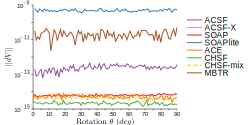

In [410]:
l = @layout [ a ; b{0.35h} ]

cur_colors1 = get_color_palette(:Paired, plot_color(:white), 100)
cur_colors = get_color_palette(:Set1, plot_color(:white), 100)

selc = [cur_colors[8],cur_colors[9],cur_colors[1],cur_colors[6],
        cur_colors[3],cur_colors[4],cur_colors[11],cur_colors[5]]
selsize = [2,2,2,2,2,2,2,2]
seltyp = [:solid, :solid, :solid, :solid, 
          :solid, :solid, :dash,  :solid]

labels=["ACSF","ACSF-X","SOAP","SOAPlite","ACE","CHSF","CHSF-mix","MBTR"]

p3 = plot(f3d[labels[1]][1][2:90], f3d[labels[1]][2][2:90], 
          lw=selsize[1], ls= seltyp[1], label=labels[1], 
          color=selc[1], seriescolor =:Paired)

for i=2:length(f3d)
    if labels[i] == "SOAPlite" || labels[i] == "MBTR"
        p3 = plot!(f3d[labels[i]][1][2:90], f3d[labels[i]][2][2:90], 
                   lw=selsize[i], ls= seltyp[i], label=labels[i], 
                   color=selc[i], seriescolor =:Paired)
    else
        p3 = plot!(f3d[labels[i]][1], f3d[labels[i]][2], 
                   lw=selsize[i], ls= seltyp[i], label=labels[i], 
                   color=selc[i], seriescolor =:Paired)
    end
end

p3 = plot!(size=(500,250);  yaxis = (:log,), legend = :outertopright,
           fg_legend = :transparent, bg_legend = :transparent,
           left_margin = [1mm 0mm],
           right_margin = [5mm 0mm],
           top_margin = [0.5mm 0mm],
           bottom_margin = [1mm 0mm],
           dpi=300, 
           xtick_direction=:out, ytick_direction=:out, 
           grid=:false,
           xticks = (collect(0:5:90), [ i%2==1 ? "$e" : "" for (i,e) in enumerate(0:5:90)]),
           yticks = (exp10.(-15:1:-9), [ i%2==1 ? "10^{$e}" : "" for (i,e) in enumerate(-15:1:-9)])
           )

ylims!((exp10.(-15),exp10.(-9)))
xlims!((0,90))

xlabel!(L"\textrm{Rotation } \theta \textrm{ }(deg)")
ylabel!(L"||dV||")

plot(p3, dpi=50)

In [411]:
savefig("figure3.pdf")

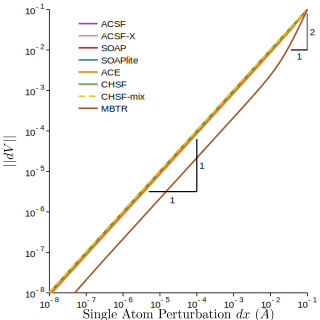

In [412]:
norm_pert(x) = 0.1 * x/maximum(x)

for i=1:length(f4d)
    if i == 1
        p4 = plot(f4d[labels[1]][1], norm_pert(f4d[labels[1]][2]), 
                  lw=selsize[1], ls= seltyp[1], label=labels[1], 
                  color=selc[1], seriescolor =:Paired)
    else
        p4 = plot!(f4d[labels[i]][1], norm_pert(f4d[labels[i]][2]), 
                   lw=selsize[i], ls= seltyp[i], label=labels[i], 
                   color=selc[i], seriescolor =:Paired)
    end
end

p4 = plot!(size=(400,400); xaxis = (:log,), yaxis = (:log,), legend=(0.2,0.95), 
           fg_legend = :transparent, bg_legend = :transparent)
p4 = plot!(exp10.(-5.3:0.1:-4), [exp10.(-5.5) for x in exp10.(-5.3:0.1:-4)], 
           lw=1.5, c=:black, label=nothing)
p4 = plot!([exp10.(-4.0) for x in exp10.(-5.5:0.1:-4.2)], exp10.(-5.5:0.1:-4.2), 
           lw=1.5, c=:black, label=nothing,
           dpi=300, xtick_direction=:out, ytick_direction=:out, 
           grid=:false,
           xticks = exp10.(-8:1:-1),
           yticks = exp10.(-8:1:-1),
           left_margin = [0mm 0mm],
           right_margin = [2mm 0mm],
           top_margin = [1mm 0mm],
           bottom_margin = [0mm 0mm])

p4 = plot!(exp10.(-1.45:0.05:-1.0), [exp10.(-2.0) for x in exp10.(-1.45:0.05:-1.0)], 
           lw=1.5, c=:black, label=nothing)
p4 = plot!([exp10.(-1.0) for x in exp10.(-2:0.1:-1.1)], exp10.(-2:0.1:-1.1), 
           lw=1.5, c=:black, label=nothing)

annotate!(exp10.(-4.6), exp10.(-5.7), text("1", :black, :right, 8))
annotate!(exp10.(-3.8), exp10.(-4.85), text("1", :black, :right, 8))
annotate!(exp10.(-0.8), exp10.(-1.55), text("2", :black, :right, 8))
annotate!(exp10.(-1.15), exp10.(-2.15), text("1", :black, :right, 8))
ylims!((exp10.(-8.0),exp10.(-1)))
xlims!((exp10.(-8.0),exp10.(-1)))
xlabel!(L"\textrm{Single Atom Perturbation } dx \textrm{ }(\AA)")
ylabel!(L"||dV||")

plot(p4, dpi=80)

In [413]:
savefig("figure4.pdf")

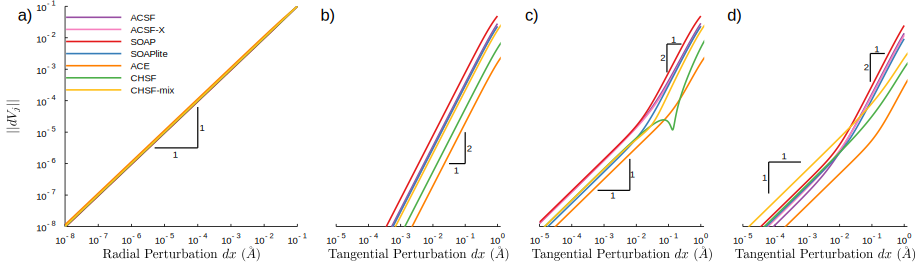

In [414]:
norm_pert(x) = x
norm_pert2(x) = 0.1 * x/maximum(x)

l = @layout [ a{0.32w} b c d ]

seltyp = [:solid, :solid, :solid, :solid, 
          :solid, :solid, :solid,  :solid]

#--------- col 1
p51 = plot(f5d[labels[1]][1][1], norm_pert2(f5d[labels[1]][1][2]) .+ 1e-20, 
           lw=selsize[1], ls= seltyp[1], label=labels[1], 
           color=selc[1], seriescolor =:Paired)

for i=2:length(f5d)
    p51 = plot!(f5d[labels[i]][1][1], norm_pert2(f5d[labels[i]][1][2]) .+ 1e-20, 
                lw=selsize[i], ls= seltyp[i], label=labels[i], 
                color=selc[i], seriescolor =:Paired)
end

p51 = plot!(size=(1150,350); xaxis = (:log,), yaxis = (:log,),  
            legend=false, #legend=(0.85,0.25), 
            fg_legend = :transparent, 
            bg_legend = :transparent, grid=false,
            left_margin = [3mm 0mm],
            right_margin = [0mm 0mm],
            top_margin = [0mm 0mm],
            bottom_margin = [4mm 0mm])

ylims!((exp10.(-8),exp10.(-1)))
xlims!((exp10.(-8),exp10.(-1)))

#1-1
p51 = plot!(exp10.(-5.3:0.1:-4), [exp10.(-5.5) for x in exp10.(-5.3:0.1:-4)], 
            lw=1.5, c=:black, label=nothing)
p51 = plot!([exp10.(-4.0) for x in exp10.(-5.5:0.1:-4.2)], exp10.(-5.5:0.1:-4.2), 
            lw=1.5, c=:black, label=nothing)

#1-1
annotate!(exp10.(-4.6), exp10.(-5.7), text("1", :black, :right, 8))
annotate!(exp10.(-3.8), exp10.(-4.85), text("1", :black, :right, 8))
annotate!(exp10.(-9),exp10.(-1),text("a)", 14, :right, :top, :black, :regular))

xlabel!(L"\textrm{Radial Perturbation } dx \textrm{ }(\AA)")
ylabel!(L"||dV_j|| \textrm{ }")

#--------- col 2

p52 = plot(f5d[labels[1]][2][1], norm_pert(f5d[labels[1]][2][2]) .+ 1e-20, 
           lw=selsize[1], ls= seltyp[1], label=labels[1], 
           color=selc[1], seriescolor =:Paired)

for i=2:length(f5d)
    p52 = plot!(f5d[labels[i]][2][1], norm_pert(f5d[labels[i]][2][2]) .+ 1e-20, 
                lw=selsize[i], ls= seltyp[i], label=labels[i], 
                color=selc[i], seriescolor =:Paired)
end

p52 = plot!(size=(1150,350); xaxis = (:log,), yaxis = (:log,),  
            legend=(-1.25,0.95), grid=false, 
            fg_legend = :transparent, 
            bg_legend = :transparent, yshowaxis=false,
            left_margin = [-2mm 0mm],
            right_margin = [0mm 0mm],
            top_margin = [0mm 0mm],
            bottom_margin = [4mm 0mm])

ylims!((exp10.(-8.0),exp10.(-1)))
xlims!((exp10.(-5.0),exp10.(0.1)))

#1-2
p52 = plot!(exp10.(-1.5:0.1:-1.0), [exp10.(-6.0) for x in exp10.(-1.5:0.1:-1.0)], 
            lw=1.5, c=:black, label=nothing)
p52 = plot!([exp10.(-1.0) for x in exp10.(-6:0.2:-5.0)], exp10.(-6:0.2:-5.0), 
            lw=1.5, c=:black, label=nothing)

#1-2
annotate!(exp10.(-1.2), exp10.(-6.2), text("1", :black, :right, 8))
annotate!(exp10.(-0.8), exp10.(-5.5), text("2", :black, :right, 8))
annotate!(exp10.(-5.05),exp10.(-1),text("b)", 14, :right, :top, :black, :regular))

xlabel!(L"\textrm{Tangential Perturbation } dx \textrm{ }(\AA)")

#--------- col 3

p53 = plot(f5d[labels[1]][3][1], norm_pert(f5d[labels[1]][3][2]) .+ 1e-20, 
           lw=selsize[1], ls= seltyp[1], label=labels[1], 
           color=selc[1], seriescolor =:Paired)

for i=2:length(f5d)
    p53 = plot!(f5d[labels[i]][3][1], norm_pert(f5d[labels[i]][3][2]) .+ 1e-20, 
                lw=selsize[i], ls= seltyp[i], label=labels[i], 
                color=selc[i], seriescolor =:Paired)
end

p53 = plot!(size=(1150,350); xaxis = (:log,), yaxis = (:log,), 
            legend=false, legendfont=8, grid=false, 
            fg_legend = :transparent, 
            bg_legend = :transparent, yshowaxis=false,
            left_margin = [-2mm 0mm],
            right_margin = [0mm 0mm],
            top_margin = [0mm 0mm],
            bottom_margin = [4mm 0mm])

ylims!((exp10.(-8.0),exp10.(-1)))
xlims!((exp10.(-5.0),exp10.(0.1)))

p53 = plot!(exp10.(-3.2:0.1:-2.2), [exp10.(-6.85) for x in exp10.(-3.2:0.1:-2.2)], 
            lw=1.5, c=:black, label=nothing)
p53 = plot!([exp10.(-2.2) for x in exp10.(-6.85:0.1:-5.85)], exp10.(-6.85:0.1:-5.85), 
            lw=1.5, c=:black, label=nothing)
p53 = plot!(exp10.(-1.05:0.05:-0.6), [exp10.(-2.2) for x in exp10.(-1.05:0.05:-0.6)], 
            lw=1.5, c=:black, label=nothing)
p53 = plot!([exp10.(-1.05) for x in exp10.(-3.1:0.05:-2.2)], exp10.(-3.1:0.05:-2.2), 
            lw=1.5, c=:black, label=nothing)
annotate!(exp10.(-2.65), exp10.(-7.0), text("1", :black, :right, 8))
annotate!(exp10.(-2.05), exp10.(-6.33), text("1", :black, :right, 8))
annotate!(exp10.(-1.1), exp10.(-2.62), text("2", :black, :right, 8))
annotate!(exp10.(-0.77), exp10.(-2.05), text("1", :black, :right, 8))


annotate!(exp10.(-5.05),exp10.(-1),text("c)", 14, :right, :top, :black, :regular))
xlabel!(L"\textrm{Tangential Perturbation } dx \textrm{ }(\AA)")

#--------- col 4

p54 = plot(f5d[labels[1]][4][1], norm_pert(f5d[labels[1]][4][2]) .+ 1e-20, 
           lw=selsize[1], ls= seltyp[1], label=labels[1], 
           color=selc[1], seriescolor =:Paired)

for i=2:length(f5d)
    p54 = plot!(f5d[labels[i]][4][1], norm_pert(f5d[labels[i]][4][2]) .+ 1e-20, 
                lw=selsize[i], ls= seltyp[i], label=labels[i], 
                color=selc[i], seriescolor =:Paired)
end

p54 = plot!(size=(1150,350); xaxis = (:log,), yaxis = (:log,), 
            legend=false, grid=false,
            fg_legend = :transparent, 
            bg_legend = :transparent, yshowaxis=false,
            left_margin = [-2mm 0mm],
            right_margin = [2mm 0mm],
            top_margin = [0mm 0mm],
            bottom_margin = [4mm 0mm])

ylims!((exp10.(-8.0),exp10.(-1)))
xlims!((exp10.(-5.0),exp10.(0.1)))

#1-1
p54 = plot!(exp10.(-4.2:0.1:-3.2), [exp10.(-5.95) for x in exp10.(-3.5:0.1:-2.5)], 
            lw=1.5, c=:black, label=nothing)
p54 = plot!([exp10.(-4.2) for x in exp10.(-6.95:0.1:-5.95)], exp10.(-6.95:0.1:-5.95), 
            lw=1.5, c=:black, label=nothing)
#1-2
p54 = plot!(exp10.(-1.05:0.05:-0.6), [exp10.(-2.5) for x in exp10.(-1.05:0.05:-0.6)], 
            lw=1.5, c=:black, label=nothing)
p54 = plot!([exp10.(-1.05) for x in exp10.(-3.4:0.05:-2.5)], exp10.(-3.4:0.05:-2.5), 
            lw=1.5, c=:black, label=nothing)

#1-1
annotate!(exp10.(-3.65), exp10.(-5.75), text("1", :black, :right, 8))
annotate!(exp10.(-4.25), exp10.(-6.43), text("1", :black, :right, 8))
#1-2
annotate!(exp10.(-1.1), exp10.(-2.92), text("2", :black, :right, 8))
annotate!(exp10.(-0.77), exp10.(-2.35), text("1", :black, :right, 8))
annotate!(exp10.(-5.05),exp10.(-1),text("d)", 14, :right, :top, :black, :regular))

xlabel!(L"\textrm{Tangential Perturbation } dx \textrm{ }(\AA)")

#----

pp = plot(p51,p52,p53,p54,layout=l, dpi=80)
pp

In [415]:
savefig("figure5.pdf")